# Applied Machine Learning (2024), exercises


## General instructions for all exercises

Follow the instructions and fill in your solution under the line marked by tag

> YOUR CODE HERE

Remove also line 

> raise NotImplementedError()

**Do not change other areas of the document**, since it may disturb the autograding of your results!
  
Having written the answer, execute the code cell by and pressing `Shift-Enter` key combination. The code is run, and it may print some information under the code cell. The focus automatically moves to the next cell and you may "execute" that cell by pressing `Shift-Enter` again, until you have reached the code cell which tests your solution. Execute that and follow the feedback. Usually it either says that the solution seems acceptable, or reports some errors. You can go back to your solution, modify it and repeat everything until you are satisfied. Then proceed to the next task.
   
Repeat the process for all tasks.

The notebook may also contain manually graded answers. Write your manually graded answer under the line marked by tag:

> YOUR ANSWER HERE

Manually graded tasks are text in markdown format. It may contain text, pseudocode, or mathematical formulas. You can write formulas with $\LaTeX$-syntax by enclosing the formula with dollar signs (`$`), for example `$f(x)=2 \pi / \alpha$`, will produce $f(x)=2 \pi / \alpha$

When you have passed the tests in the notebook, and you are ready to submit your solutions, validate and submit your solution using the nbgrader tools from the `Nbgrader/Assignment List`-menu.


# Unsupervised learning, clustering

## Task 1: Apply k-means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling

The data-file `liver-spectroscopy.tab` is a text file which contains a Near Infrared Spectral (NIR) measurements of different cells from a liver. The file includes 731 samples, and each one has 234 variables. The variables describes the amount of infrared radiation absorbed in each of the tested 234 wavelengths. The last column in the data is the cell type, which can be one of the four types: 'collagen', 'glycogen', 'lipids' or 'DNA'. The column names are the wavelengths used in measuring the absorbtion values for the specific columns.

Why the code uses `read_table` - function instead of `read_csv`?

In [2]:
#YOUR CODE HERE
D = pd.read_table('liver-spectroscopy.tab')


print(D.type.unique())


types=pd.Categorical(D.type)
del(D['type'])

['collagen' 'glycogen' 'lipids' 'DNA']


First task is to apply PCA to transform the data `D` to PCA projection `projected`. Then apply KMeans to `projected` and try to find clusters from the data. Use just enough PCA-components to contain more than 90% of the variance. Name your KMeans object as `kmeans` and `km_clusters` as the name of the predicted cluster membership.

Plot the clusters using PC1 and PC2 axis using scatter plot. Use different color for each cluster in the plot.

Needed variables for grading

| Variable | Name |
| ----------|------|
| Dataframe containing the liver spectroscopy data | `D` |
| PCA projection of the spectroscopy data   | `projected` |
| Trained kmeans clustering object | `kmeans` |
| K-means Predicted cluster membership | `km_clusters` | 

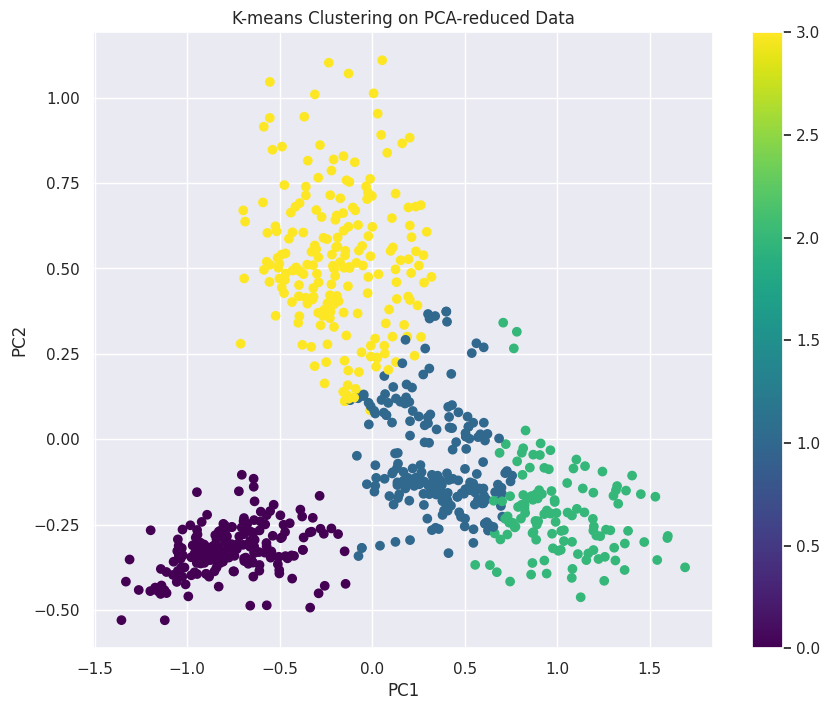

In [3]:
# YOUR CODE HERE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=0.9, svd_solver='full')
projected = pca.fit_transform(D)
kmeans = KMeans(n_clusters=4, random_state=42)
km_clusters = kmeans.fit_predict(projected)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(projected[:, 0], projected[:, 1], c=km_clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('K-means Clustering on PCA-reduced Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [4]:
points=0
required_variables=('D','projected','kmeans','km_clusters')
for variable in required_variables:
    if variable not in globals():
        print (f"Variable {variable} is missing, please define it!")
        raise Exception(f"Variable '{variable}' is not defined")
    
if (abs(kmeans.inertia_-105)<10):
    points+=1
else:
    print("Intertia is not correct", kmeans.inertia_)
points

Intertia is not correct 75.59208636938655


0

## Task 2, apply PCA and GMM

Use previous PCA projection and apply Gaussian Mixture Model to projected data and try to find clusters from the data. Use `gmm` as a name for GaussianMixture object and `gmm_clusters` as the name of the predicted cluster membership.

Plot the clusters with different colors in the scatter plot using PC1 and PC2 axis.

| Variable | Name |
| ----------|------|
| Trained Gaussian Mixture Model clustering object | `gmm` |
| GMM Predicted cluster membership | `gmm_clusters` | 

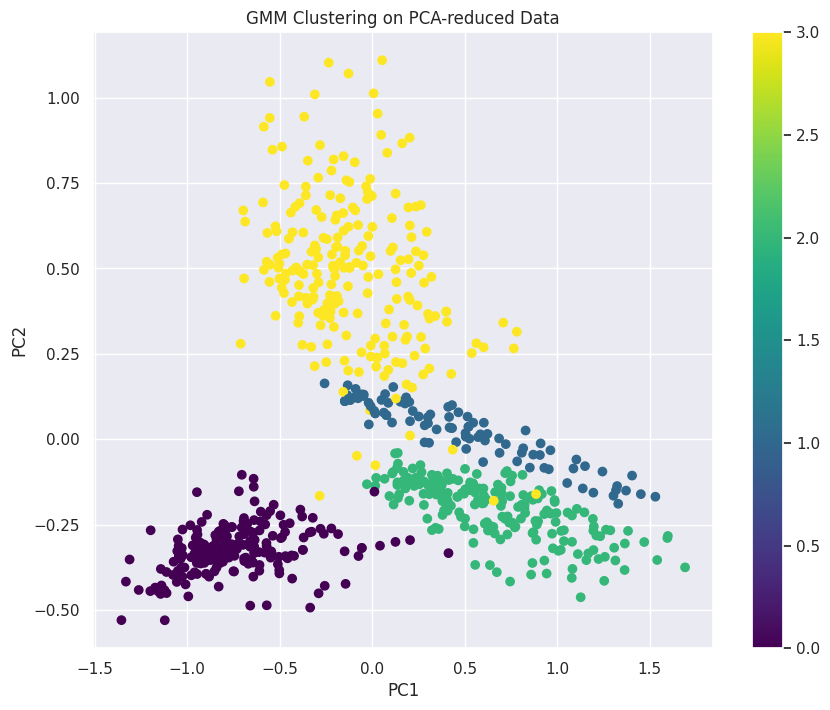

In [5]:
# YOUR CODE HERE
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_clusters = gmm.fit_predict(projected)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(projected[:, 0], projected[:, 1], c=gmm_clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('GMM Clustering on PCA-reduced Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [6]:
points=0
required_variables=('gmm','gmm_clusters')
for variable in required_variables:
    if variable not in globals():
        print (f"Variable {variable} is missing, please define it!")
        raise Exception(f"Variable '{variable}' is not defined")
    
points

0

## Task 3: Quality of the clusterings

Calculate the quality of the clustering achieved using KMeans and GMM methods to find out which one is better. Studying the quality of clustering without knowing the true data, is very difficult. 
Use `sklearn.metrics.silhouette_score()` to find out the quality of clustering in Kmeans and GMM cases. 

| Variable | Name |
| ----------|------|
| Silhouette score of KMeans clustering | `km_sscore` |
| Silhouette score of GMM clustering | `gmm_sscore` | 

What does the score tell about the quality? Which clustering method is better? Is it correct?

In [7]:
# YOUR CODE HERE
from sklearn.metrics import silhouette_score
km_sscore = silhouette_score(projected, km_clusters)
gmm_sscore = silhouette_score(projected, gmm_clusters)

print(f"KMeans Silhouette Score: {km_sscore}")
print(f"GMM Silhouette Score: {gmm_sscore}")

KMeans Silhouette Score: 0.5001296397580743
GMM Silhouette Score: 0.34822295090196925


In [8]:
points=0
required_variables=('km_sscore','gmm_sscore')
for variable in required_variables:
    if variable not in globals():
        print (f"Variable {variable} is missing, please define it!")
        raise Exception(f"Variable '{variable}' is not defined")
    
points

0


It is more reliable to estimate the result of clustering in case when the true classes are known. One typical metric of quantifying the clustering in this situation is rand score:

$$ S_\mathrm{rand} = \frac{N_a}{N_p} $$

where $N_a$ = number of agreeing points and $N_p$ = the number of pairs.

| Variable | Name |
| ----------|------|
| Rand score of KMeans clustering | `km_rscore` |
| Rand score of GMM clustering | `gmm_rscore` | 

Check what seems to be now the best clustering method. Does the result differ from Silhouette score, if so why, and which method is more probably correct?

In [9]:
# YOUR CODE HERE
from sklearn.metrics import adjusted_rand_score

km_rscore = adjusted_rand_score(types, km_clusters)
gmm_rscore = adjusted_rand_score(types, gmm_clusters)

print(f"KMeans Adjusted Rand Score: {km_rscore}")
print(f"GMM Adjusted Rand Score: {gmm_rscore}")

KMeans Adjusted Rand Score: 0.6510809084651018
GMM Adjusted Rand Score: 0.9255996746366558


In [10]:
points=0
required_variables=('km_rscore','gmm_rscore')
for variable in required_variables:
    if variable not in globals():
        print (f"Variable {variable} is missing, please define it!")
        raise Exception(f"Variable '{variable}' is not defined")
    
points


0

## Task 3: The probability of the samples

The GMM model includes the function called `.predict_proba()` which returns the probability that a certain sample belongs to different clusters. Calculate the probabilities of each sample belongin to each cluster and assign the result in variable `P`. Then find out the probability that the cluster of the last sample is the same as the true class of the same sample. Assing that probability to variable `p_last`. 

But how can you know which cluster represents which class? 
- Look first what is the class of last 10 samples in `types`.
- Then look from your `P`-matrix, which of the four clusters is most often predicted for the last 10 samples.
- That cluster number most probably corresponds to the class what the last 10 samples represent. Read the propability value of that column from the last row of `P` and save that to `p_last`.

**ATTENTION!** But since GMM is partly stochastic, it assigns the clusters differently every time. Therefore there is not a proper way to make the above so that it would pass the autograding, when the code is run again, and the cluster numbers may change. Therefore, for now, just assign the largest probability of the last sample to `p_last`.

| Variable | Name |
| ----------|------|
| Predicted probabilities | `P` |
| Predicted probability that the last sample is from class DNA | `p_last` | 


In [11]:
# YOUR CODE HERE
P = gmm.predict_proba(projected)
p_last = np.max(P[-1])

print(f"Probability of the last sample belonging to its most likely cluster: {p_last}")

Probability of the last sample belonging to its most likely cluster: 0.995672334748868


In [12]:
points=0
required_variables=('P', 'p_last')
for variable in required_variables:
    if variable not in globals():
        print (f"Variable {variable} is missing, please define it!")
        raise Exception(f"Variable '{variable}' is not defined")

points+=1
points

1

## Task 4: Evaluation

This answer is not going to be evaluated, but think about the answers and test how much you have understood. We can go through the answers in the classroom.

1. Which clustering method, KMeans or GMM is better for this case and why?
1. How can the quality of the clustering methods be assessed if 
    1. the true classes are known?
    1. the true classes are not known?
    
Answer by writing text or Markdown text in the cell below.

YOUR ANSWER HERE1 GMM is more flexible than KMeans 
2A Adjusted Rand Index (ARI),Normalized Mutual Information (NMI),Purity and F1 score
2B Silhouette Score and Elbow Method